We import standard numpy and pandas to be able to perform analysis with python, also we need data visualization libraries matplotlib and seaborn to oitput interesting visual findings, and some setting to make our kernel prettier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime

warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

## Loading Test Data

Next, I will load the dataset into pandas Dataframe Which will facilitate easy manipulation and analysis

In [4]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Initial Data Analysis

First I will perform a preliminary analysis to understand the structure and types of data columns:

In [5]:
df.shape

(1000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
df['Customer type'].nunique()

2

In [10]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [11]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [12]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [13]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [14]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

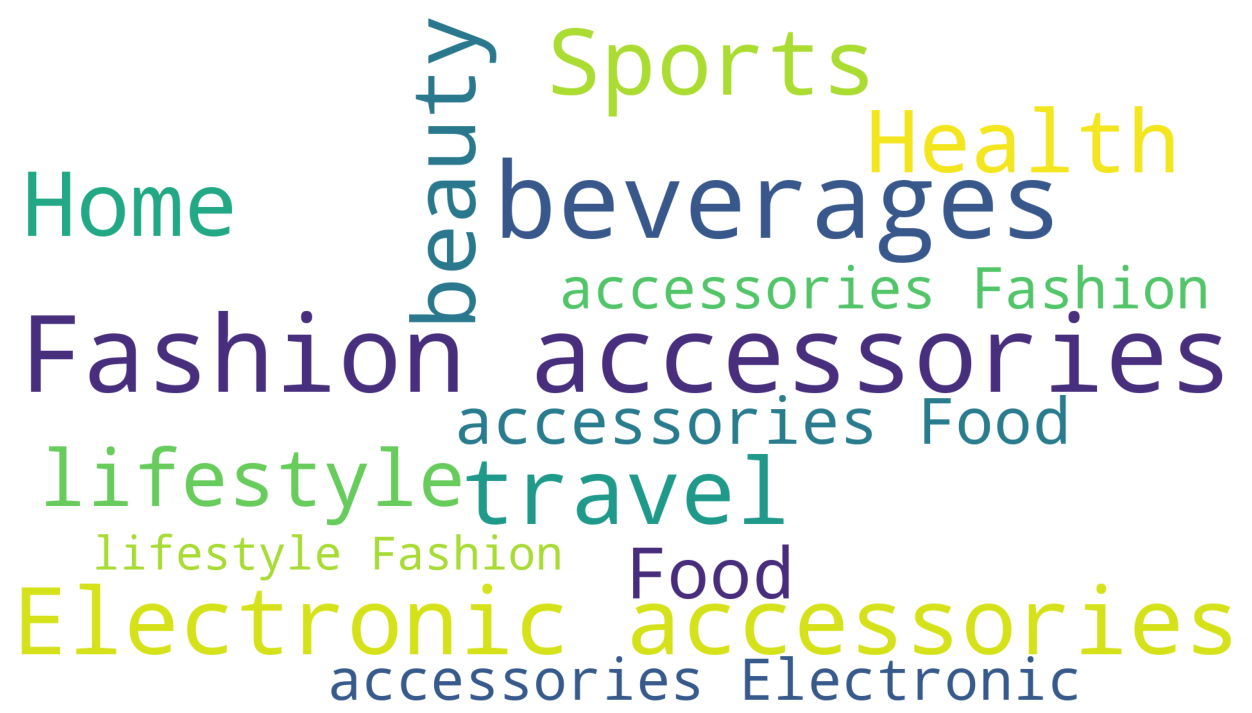

In [15]:
from wordcloud import WordCloud

plt.subplots(figsize=(20, 9))
wordcloud = WordCloud(background_color='White', width=1920, height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('cast.png')
plt.show()

## Checking If there are any missig Value

In [16]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Exploratory Data Analysis (EDA)

EDA(Exploratory Data Analysis) in simple words is like being a detective for data. It's the process of examining and understanding a dataset before you start building models or making decisions based on the data.

EDA is like exploring a new place, looking for clues, and making sense of what you find making any imoortant decisions. It's a crucial step in the data analysis process.

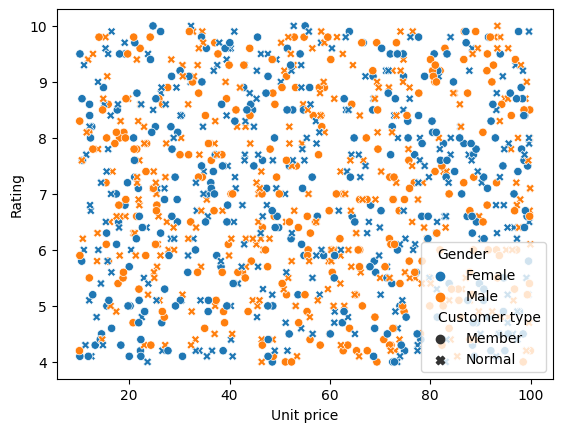

In [17]:
sns.scatterplot(data=df, x='Unit price', y='Rating', hue='Gender', style ='Customer type')
plt.show()

### BOXPLOT

A boxplot is a standardized way of displaying of datya based on a five number summary ("minimum", first quartile (Q1), median, third Quartile(Q3), and 'maximum'). It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: xlabel='gross income'>

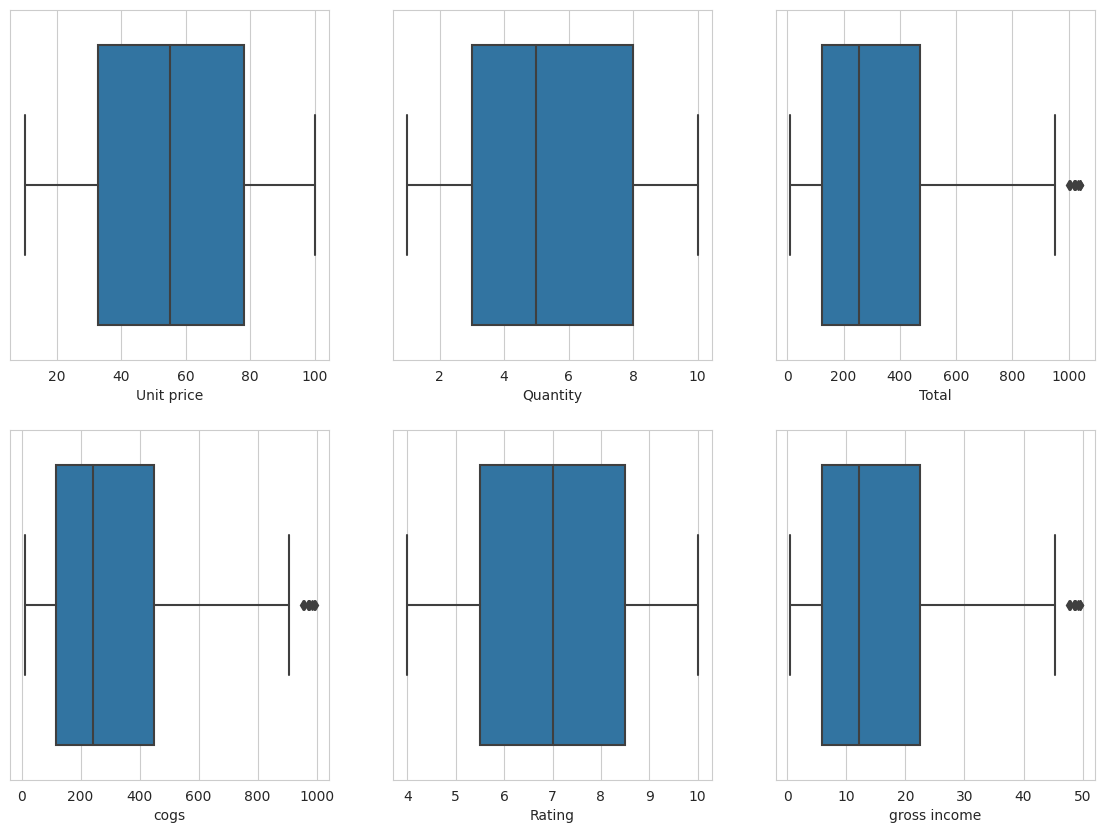

In [18]:
plt.figure(figsize=(14, 10))
sns.set_style(style='whitegrid')
plt.subplot(2, 3, 1)
sns.boxplot(x='Unit price', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='Quantity', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='Total', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='cogs', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='Rating', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='gross income', data=df)


### KDEPLOT

kdeplot is a data visualization technique that employs Kernel Density Estimation (KDE) to estimat and display the probability density function of continuous data. It produces a smoothed, continuous curve that reveals the underlying distribution's shape and characteristics. This method is particularly useful for exploring data patterns, identifying peaks, and visualizing the density of both univariate and bivariate data. kdeplot offers a complementary perspective to histograms and aids in undersyanding the distribution of data in a more detailed and visually appealing manner.

<Axes: xlabel='gross income', ylabel='Density'>

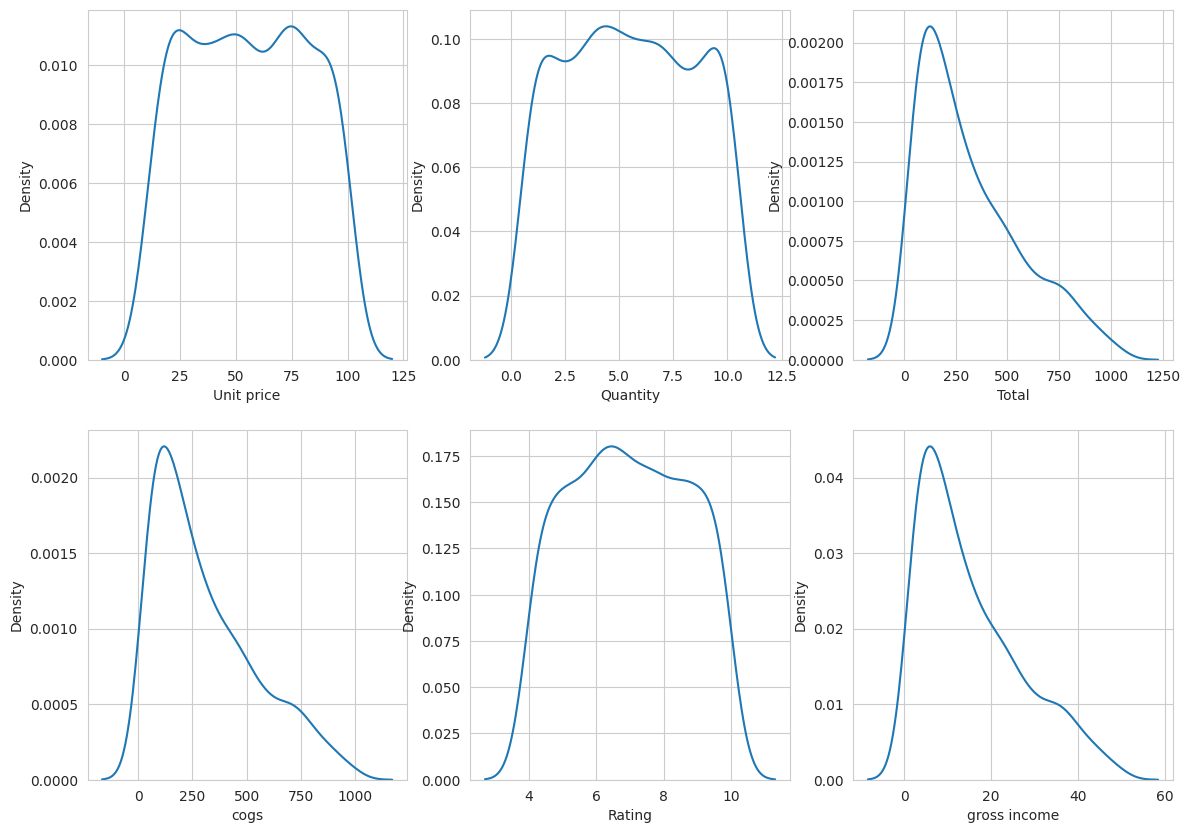

In [20]:
plt.figure(figsize=(14, 10))
sns.set_style(style='whitegrid')
plt.subplot(2, 3, 1)
sns.kdeplot(x='Unit price', data=df)
plt.subplot(2, 3, 2)
sns.kdeplot(x='Quantity', data=df)
plt.subplot(2, 3, 3)
sns.kdeplot(x='Total', data=df)
plt.subplot(2, 3, 4)
sns.kdeplot(x='cogs', data=df)
plt.subplot(2, 3, 5)
sns.kdeplot(x='Rating', data=df)
plt.subplot(2, 3, 6)
sns.kdeplot(x='gross income', data=df)

### PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column

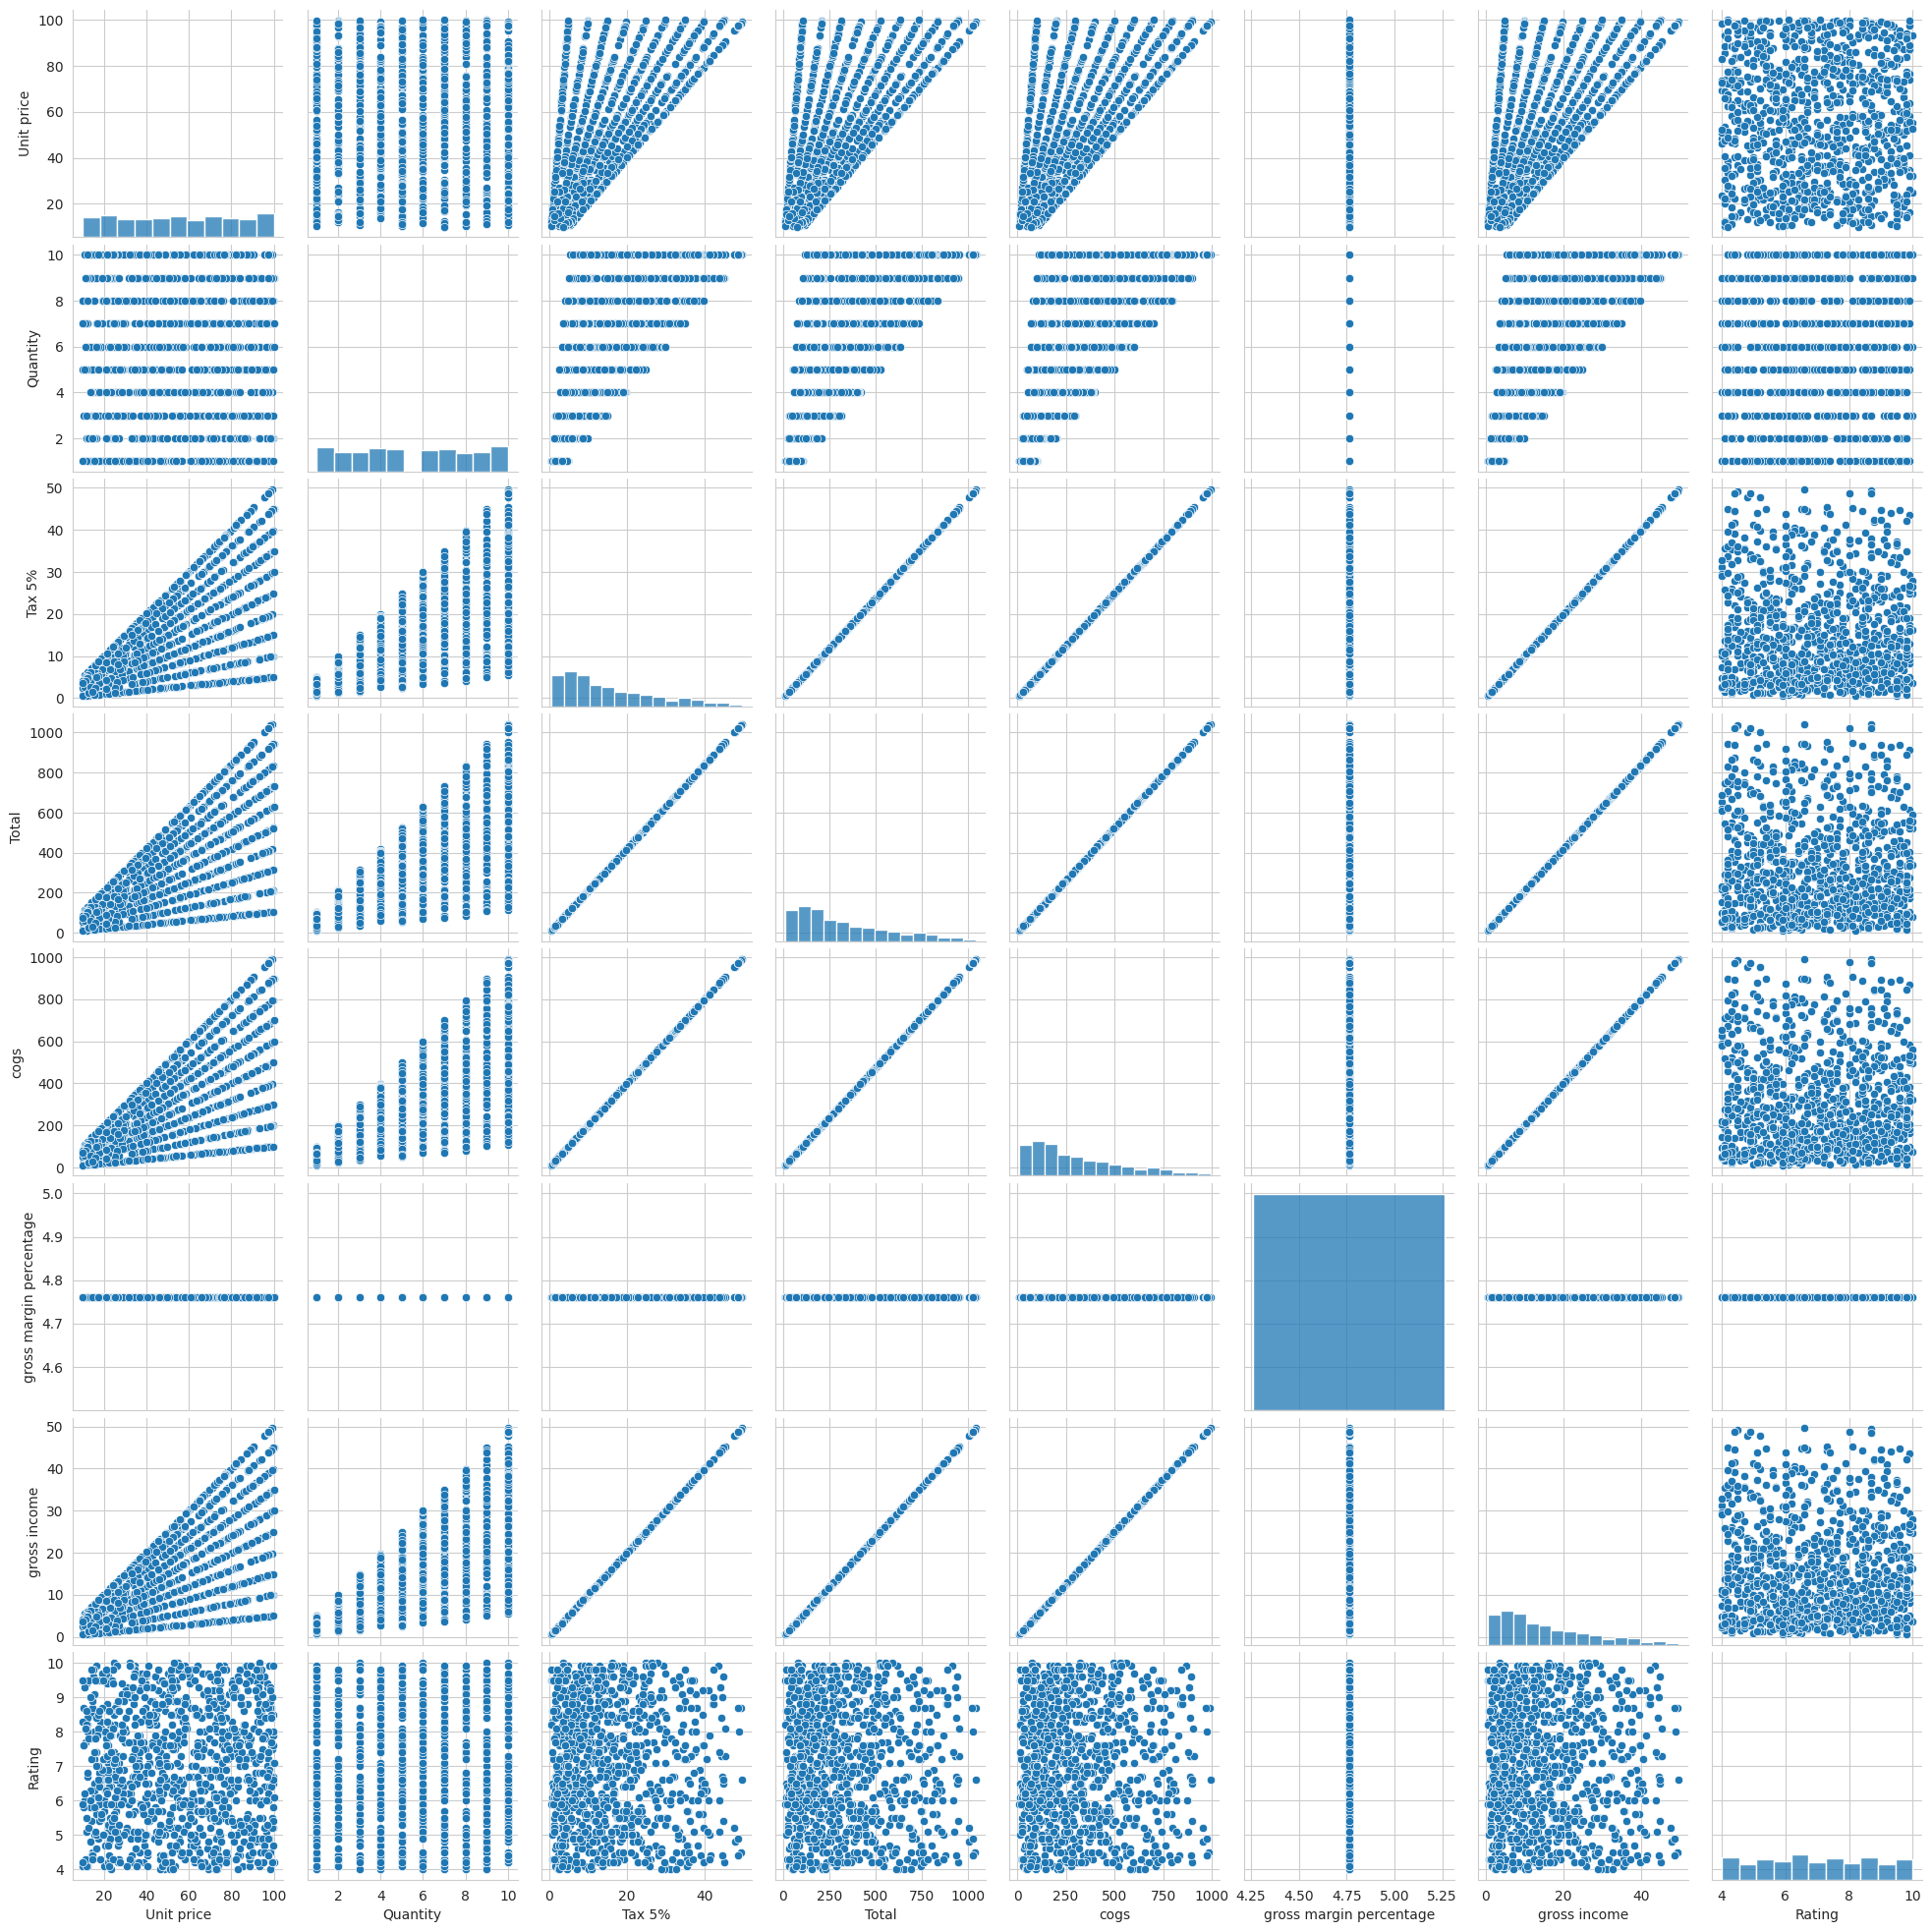

In [21]:
sns.pairplot(data=df)

### BARPLOT

A barplot (or barchart) is one of the most common typoes of graphic. It shows the relationship betweena. numeric and a catehgoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value

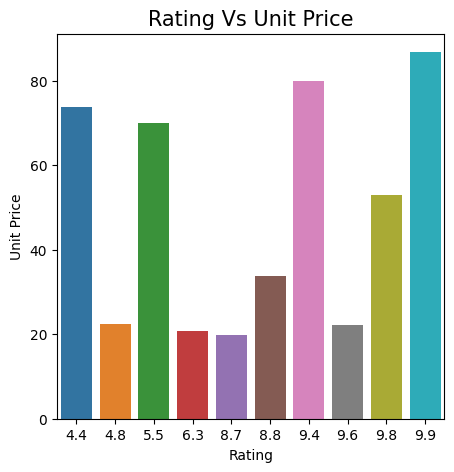

In [22]:
plt.style.use('default')
plt.figure(figsize=(5,5))
sns.barplot(x='Rating', y='Unit price', data=df[170:180])
plt.title("Rating Vs Unit Price", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

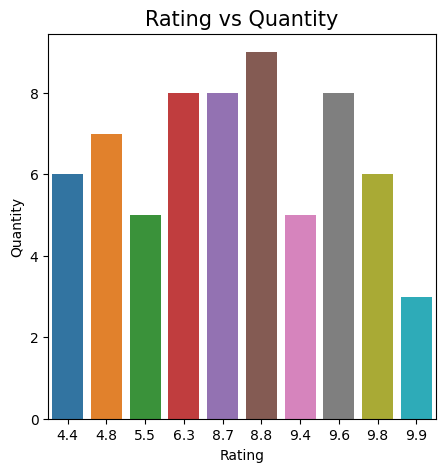

In [23]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()


## Correlation

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus features dselection should be done carefully. This dataset has less featires but still we will see the correlation


In [24]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

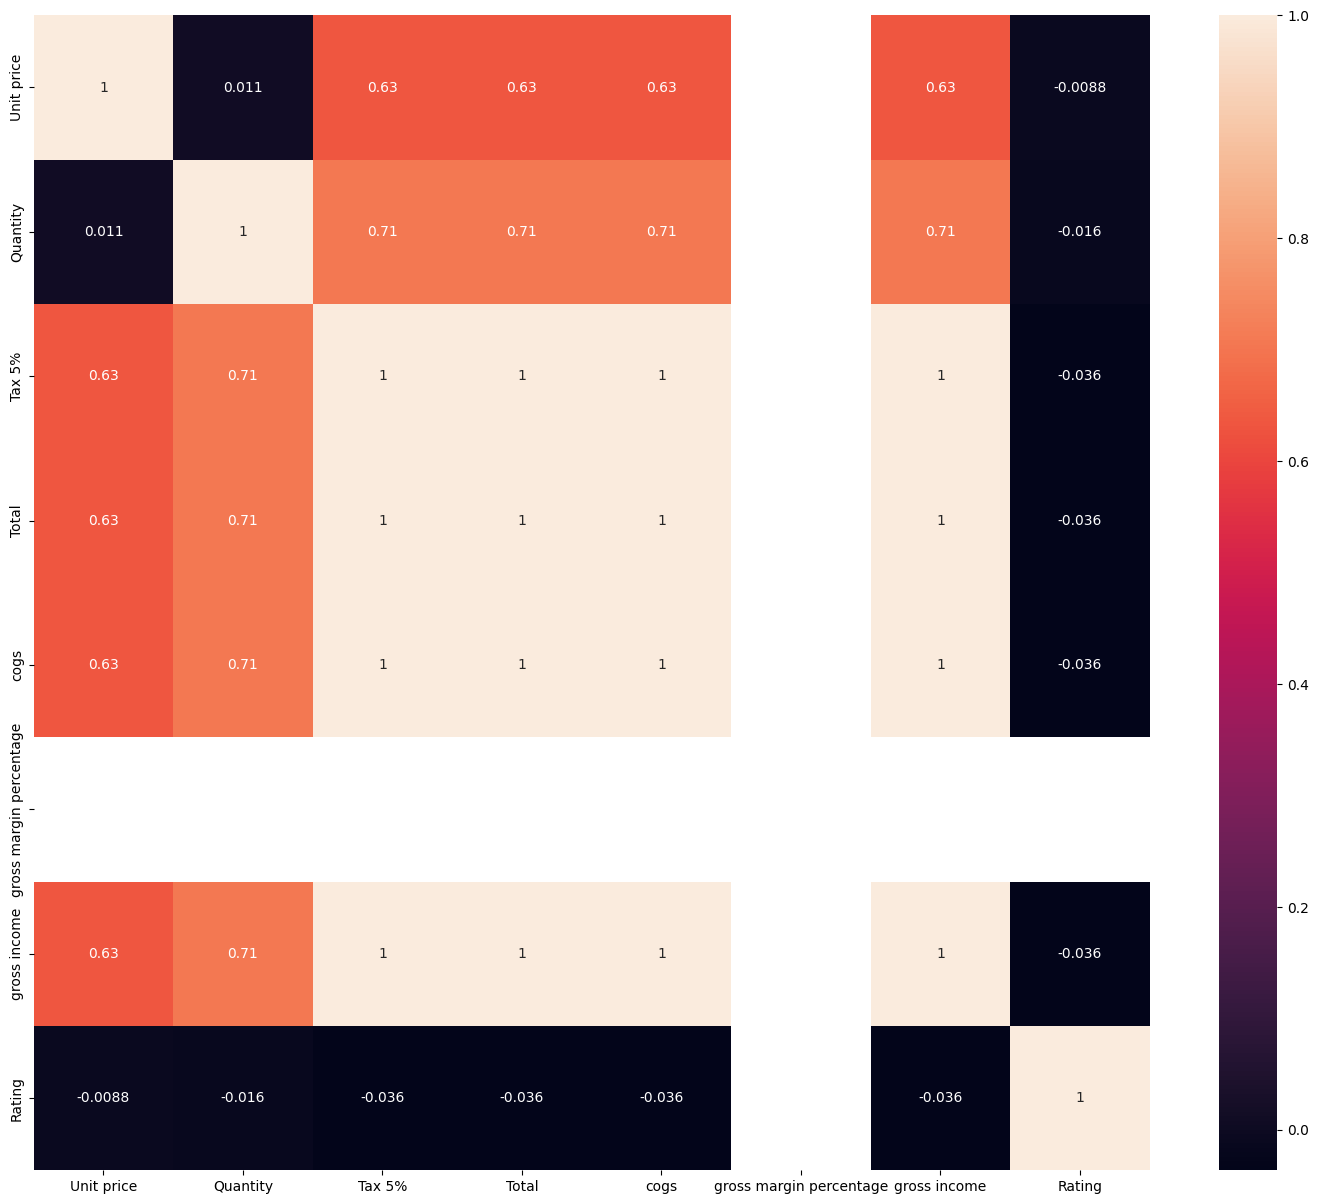

In [25]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True)


In [26]:
# Lets find the categorical features

list_1  = list(df.columns)

In [27]:
list_cate = []
for i in list_1:
  if df[i].dtype == 'object':
    list_cate.append(i)


In [28]:
list_cate

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

## Label Encoding

In [29]:
le = LabelEncoder()

In [30]:
for i in list_cate:
  df[i] = le.fit_transform(df[i])


In [31]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


### Splitting the data into Training and Testing Dataset


In [32]:
y = df['Gender']
X= df.drop('Gender', axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0, test_size = 0.2)


## Building Machine Learning Models

### 1. K Nearest Neighbor

K-Nearest Neighbor is one of the simplest Machine Learning Algorithms based on Supervised Learning Technique

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into category that is most similar to the available categories

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new datav appears then it can be easily classified into a well suite category by using K-NN algorithm

In [36]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred = knn.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("Training Score:\n", knn.score(X_train, y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


### 2. Decision Tree

A decision tree is a flowchart like structure in which each internal node represents a test on a feature (e.g. wjhether a coin flip comes up heads or tails), each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The path from root to leaf represent classification rules.

In [41]:
dtree = DecisionTreeClassifier(max_depth= 6, random_state =123, criterion = 'entropy' )
dtree.fit(X_train, y_train)


In [49]:
y_pred = dtree.predict(X_test)

print("Classification Report is:\n", classification_report(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("Training Score:\n", dtree.score(X_train, y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


### 3. Random Forest

Random Forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest splits out a class prediction and the class with the most votes becomes our model's prediction.

A large number of relatively uncorrelated models (trees) operating as a committee will outpperform any of the individual constituent models.

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rfc.predict(X_test)

print("Classification Report is:\n", classification_report(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("Training Score:\n", rfc.score(X_train, y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       100
           1       0.48      0.44      0.46       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion matrix:
 [[52 48]
 [56 44]]
Training Score:
 100.0


### 4. Gradient Boosting Classifier

The GradientBoostingClassifier is a machine learning model designed of classification tasks. It utilizes gradient boosting, an ensemble technique, to combine the predictions of multiple weak classifiers sequentially. With features like weighted voting, adjustable learnoing rates, and regularization parameters, it provides robust and accurate solutions for a wide range of classification problems. It is particularly useful when dealing with complex datasets and has applications in spam detection, fraud prevention, and imahge classification, among others

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
y_pred = gbc.predict(X_test)

print("Classification Report is:\n", classification_report(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("Training Score:\n", gbc.score(X_train, y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48       100
           1       0.47      0.46      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion matrix:
 [[48 52]
 [54 46]]
Training Score:
 88.75


### Which is the best Model?

As a see best Model is given by Random Forest Classifier (100% Accuracy)